# Graph based Clustering

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

### Load the dataset

In [104]:
data_path = 'season-2425.csv'  # Ensure this is the correct path if running locally
data = pd.read_csv(data_path)

### Display dataset information


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      177 non-null    object
 1   HomeTeam  177 non-null    object
 2   AwayTeam  177 non-null    object
 3   FTHG      177 non-null    int64 
 4   FTAG      177 non-null    int64 
 5   FTR       177 non-null    object
 6   HTHG      177 non-null    int64 
 7   HTAG      177 non-null    int64 
 8   HTR       177 non-null    object
 9   Referee   177 non-null    object
 10  HS        177 non-null    int64 
 11  AS        177 non-null    int64 
 12  HST       177 non-null    int64 
 13  AST       177 non-null    int64 
 14  HF        177 non-null    int64 
 15  AF        177 non-null    int64 
 16  HC        177 non-null    int64 
 17  AC        177 non-null    int64 
 18  HY        177 non-null    int64 
 19  AY        177 non-null    int64 
 20  HR        177 non-null    int64 
 21  AR        177 no

### Select numerical columns for clustering

In [162]:
# Here we focus on match stats like goals, shots, and fouls
selected_columns = ['FTHG', 'FTAG', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC']
clustering_data = data[selected_columns]

### Handle missing values (if any)

In [163]:
clustering_data = clustering_data.dropna()

### Standardize the data

In [164]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

### Perform PCA for visualization (reduce to 2 dimensions)

In [165]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

### Perform Agglomerative Clustering

In [170]:
# Adjust n_clusters as needed
n_clusters = 3

### Run Agglomerative Clustering

In [171]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(scaled_data)

### Add cluster labels to the dataset

In [172]:
data['Cluster'] = clusters

### Visualize clusters in 2D PCA space

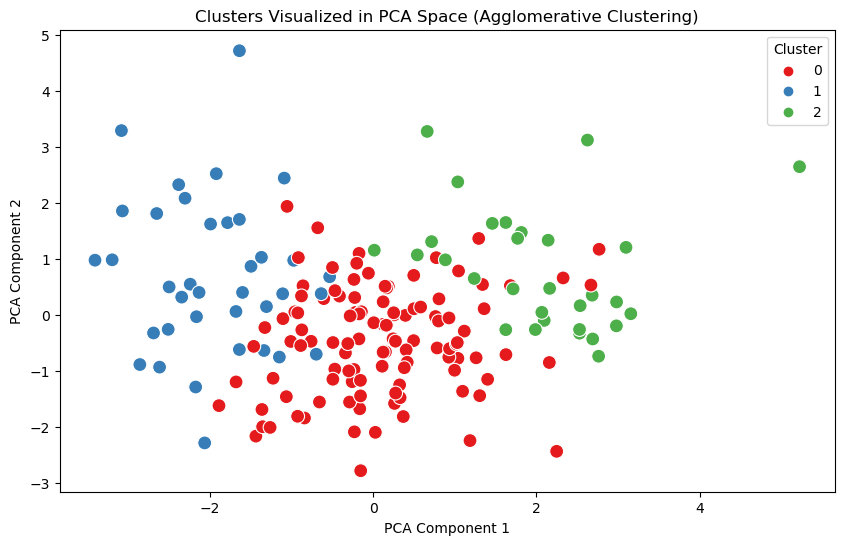

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=clusters,
    palette='Set1',
    s=100
)
plt.title('Clusters Visualized in PCA Space (Agglomerative Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1, 1))
plt.show()


### Calculate and display model efficiency using Silhouette Score (for clusters > 1)

In [175]:
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(scaled_data, clusters)
    print(f"Silhouette Score for the model: {silhouette_avg:.2f}")
else:
    print("Silhouette Score cannot be calculated as all points belong to one cluster.")

Silhouette Score for the model: 0.13


### Save clustered data to a new CSV file

In [176]:
data.to_csv('graph_based_clustered_football_data.csv', index=False)

print("Clustering complete! The clustered data has been saved as 'graph_based_clustered_football_data.csv'.")


Clustering complete! The clustered data has been saved as 'graph_based_clustered_football_data.csv'.
